<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Churn_PyCaret_18nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763

https://colab.research.google.com/drive/17o3DEBv2T8K3V5k9RXksLpsXUxcwSZgH#scrollTo=BxTKAJoLC6U7

In [1]:
!pip install pycaret # Instalar PyCaret no Colab

     |████████████████████████████████| 256kB 7.2MB/s 
     |████████████████████████████████| 276kB 17.3MB/s 
     |████████████████████████████████| 174kB 17.6MB/s 
     |████████████████████████████████| 6.8MB 18.3MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 1.6MB 40.7MB/s 
     |████████████████████████████████| 148.9MB 89kB/s 
     |████████████████████████████████| 13.9MB 38.0MB/s 
     |████████████████████████████████| 66.3MB 119kB/s 
     |████████████████████████████████| 266kB 42.1MB/s 
     |████████████████████████████████| 1.8MB 35.9MB/s 
     |████████████████████████████████| 2.1MB 29.5MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 1.1MB 30.3MB/s 
     |████████████████████████████████| 163kB 41.6MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 337kB 39.2MB/s 
     |████████████████████████████████| 153kB 42.3MB

In [13]:
# Carregar bibliotecas
import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import pycaret                                        # Pycaret
from pycaret.regression import *                      # Pycaret para Regressão
from pycaret.utils import enable_colab                # Para executar gráficos no Colab

from pycaret import regression as pyreg

In [31]:
url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

In [277]:
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [177]:
def trata_Dependents(df):
  linha_Dependents_nan = df[df['Dependents'].isna()].index
  for i in linha_Dependents_nan:
    if df['Partner'][i] == 'Yes':
      df['Dependents'][i] = 'Yes'
    else:
      df['Dependents'][i] = 'No'
  return df

In [178]:
def trata_PaymentMethod(df):
  indice = df[df['PaymentMethod'].isna()].index
  for i in indice:
    if df['Contract'][i]=='Month-to-month':
      moda = df['PaymentMethod'][df['Contract']=='Month-to-month'].mode(0)
      df['PaymentMethod'][i] = moda[0]
    if df['Contract'][i] =='Two year':
      moda = df['PaymentMethod'][df['Contract']=='Two year'].mode(0)
      df['PaymentMethod'][i] = moda[0]
    if df['Contract'][i] =='One year':
      moda = df['PaymentMethod'][df['Contract']=='One year'].mode(0)
      df['PaymentMethod'][i] = moda[0]
  return df

In [179]:
def trata_tenure(df):
  indice = df[df['tenure'].isna()].index
  for i in indice:
    if df['Contract'][i]=='Month-to-month':
      df['tenure'][i] = df[df['Contract']=='Month-to-month']['tenure'].median()
    if df['Contract'][i] =='Two year':
      df['tenure'][i] = df[df['Contract']=='Two year']['tenure'].median()
    if df['Contract'][i] =='One year':
      df['tenure'][i] = df[df['Contract']=='One year']['tenure'].median()
  return df

In [278]:
def trata_col(df):
  df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
  df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,'0')
  df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,'1')
  #trata_tenure(df)
  #trata_Dependents(df)
  #trata_PaymentMethod(df)
  return df

In [279]:
df_train = f_trata_col(df_train)
df_test = f_trata_col(df_test)

df_train.set_index('id', inplace=True)
df_test.set_index('id', inplace=True)

In [280]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [281]:
def dropando(df):
  df = df.drop(['OnlineSecurity','OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV','StreamingMovies'],
               axis = 1)
  return df

In [282]:
df_train = dropando(df_train)
df_test = dropando(df_test)

In [259]:
def cria_dummies(df):
  ohe=pd.get_dummies(df,drop_first=False)
  ohe.columns = ohe.columns.str.replace(' ', '_')
  ohe.columns = ohe.columns.str.replace('(','')
  ohe.columns = ohe.columns.str.replace(')','')
  return ohe

In [260]:
df_train = cria_dummies(df_train)

In [261]:
df_test = cria_dummies(df_test)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   object 
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 5027 to 5773
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1409 non-null   object 
 1   SeniorCitizen     1409 non-null   object 
 2   Partner           1409 non-null   object 
 3   Dependents        1368 non-null   object 
 4   tenure            1291 non-null   float64
 5   PhoneService      1409 non-null   object 
 6   MultipleLines     1409 non-null   object 
 7   InternetService   1409 non-null   object 
 8   OnlineSecurity    1409 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  1409 non-null   object 
 11  TechSupport       1409 non-null   object 
 12  StreamingTV       1409 non-null   object 
 13  StreamingMovies   1409 non-null   object 
 14  Contract          1409 non-null   object 
 15  PaperlessBilling  1409 non-null   object 
 16  PaymentMethod     1379 non-null   objec

In [283]:
reg = pyreg.setup(data = df_train,      # Banco de dados
                  target = 'Churn',     # Desfecho que estamos tentando prever
                  train_size = 0.75)     # Proporção do banco de treino
       

,Description,Value
0,session_id,7725
1,Target,Churn
2,Original Data,"(5634, 14)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4225, 24)"


Model	- MAE(Accuracy) -	MSE(AUC) -	RMSE(Recall) -	R2(Prec.	F1) -	RMSLE(Kappa)	-  MAPE(MCC) -  TT (Sec)

In [284]:
_# Treinar modelos
pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2702,0.1360,0.3685,0.3016,0.2589,0.5039,0.462
br,Bayesian Ridge,0.2955,0.1404,0.3745,0.2795,0.2644,0.5265,0.021
lr,Linear Regression,0.2955,0.1405,0.3746,0.2791,0.2646,0.5243,0.306
ridge,Ridge Regression,0.2955,0.1405,0.3746,0.2791,0.2646,0.5243,0.018
lar,Least Angle Regression,0.2955,0.1405,0.3746,0.2791,0.2646,0.5243,0.020
catboost,CatBoost Regressor,0.2696,0.1415,0.3758,0.2734,0.2639,0.4951,2.589
lightgbm,Light Gradient Boosting Machine,0.2672,0.1428,0.3776,0.2668,0.2646,0.4953,0.100
ada,AdaBoost Regressor,0.3174,0.1455,0.3813,0.2530,0.2728,0.5281,0.091
rf,Random Forest Regressor,0.2685,0.1462,0.3822,0.2492,0.2698,0.4888,1.193
huber,Huber Regressor,0.2799,0.1483,0.3846,0.2397,0.2685,0.5357,0.112


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7725, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [285]:
# Criar Modelo - Siglas dos modelos: https://pycaret.org/regression/#create-model
# MAE(Accuracy) -	MSE(AUC) -	RMSE(Recall) -	R2(Prec.	F1) -	RMSLE(Kappa)	-  MAPE(MCC) -  TT (Sec)
gbr = pyreg.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2585,0.1252,0.3538,0.3872,0.2455,0.4849
1,0.2754,0.1440,0.3794,0.2080,0.2691,0.4975
2,0.2498,0.1181,0.3437,0.3545,0.2432,0.4838
3,0.2918,0.1523,0.3902,0.2430,0.2747,0.5265
4,0.2699,0.1359,0.3687,0.3559,0.2550,0.4849
5,0.2781,0.1418,0.3765,0.3067,0.2646,0.4864
6,0.2587,0.1322,0.3637,0.3178,0.2542,0.5077
7,0.2806,0.1384,0.3720,0.2688,0.2641,0.5057
8,0.2835,0.1465,0.3828,0.2687,0.2676,0.5373
9,0.2562,0.1257,0.3545,0.3049,0.2510,0.5243


In [157]:
# Ver parâmetros do melhor modelo
print(rr)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7131, solver='auto', tol=0.001)


In [158]:
# Avaliar parâmetros
pyreg.plot_model(rr, plot='parameter')

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,None
normalize,False
random_state,7131
solver,auto
tol,0.001


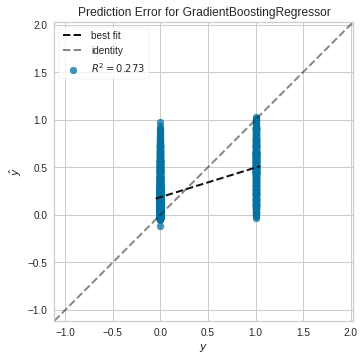

In [189]:
# Comparar predições e resultados do banco de teste
pyreg.plot_model(gbr, plot='error')

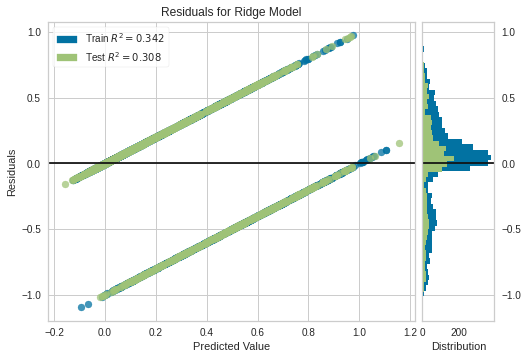

In [160]:
# Comparar os resíduos
pyreg.plot_model(rr, plot='residuals')

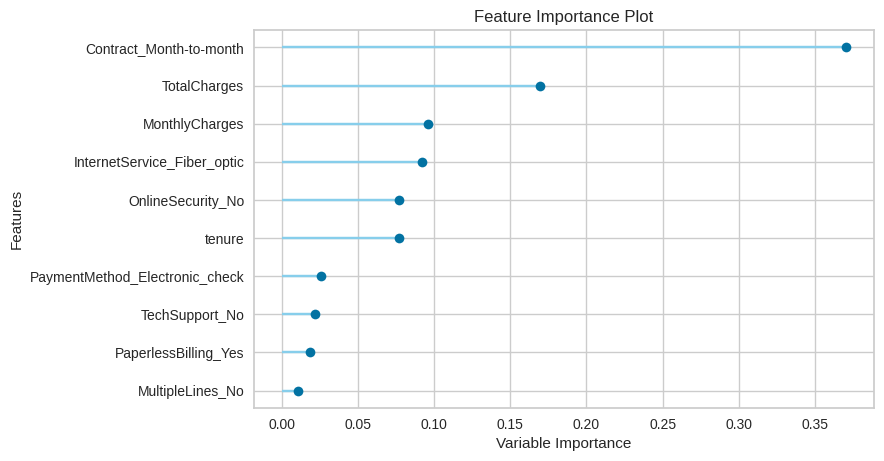

In [191]:
# Verificar importância das variáveis
pyreg.plot_model(gbr, 'feature')

In [286]:
gbr_holdout = pyreg.predict_model(gbr, data = df_test)

In [287]:
gbr_holdout['Churn'] = abs(round(gbr_holdout['Label'],0))

gbr_holdout['Churn'].value_counts()

0.0    1110
1.0     299
Name: Churn, dtype: int64

In [288]:
gbr_holdout['Churn'] = gbr_holdout['Churn'].astype('int')

In [289]:
gbr_holdout['Churn'].value_counts()

0    1110
1     299
Name: Churn, dtype: int64

In [290]:
df_submit = pd.DataFrame(zip(gbr_holdout.index,gbr_holdout['Churn']), columns=['id','Churn'])
df_submit.to_csv('Churn_pycaret_11.csv', index=False, sep=',')

In [291]:
tuned_gbr = tune_model(gbr, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2586,0.1274,0.3569,0.3761,0.2479,0.4816
1,0.2730,0.1473,0.3838,0.1897,0.2717,0.4975
2,0.2547,0.1242,0.3525,0.3210,0.2494,0.4874
3,0.2863,0.1558,0.3947,0.2254,0.2773,0.5294
4,0.2644,0.1349,0.3673,0.3608,0.2525,0.4866
5,0.2808,0.1467,0.3830,0.2826,0.2696,0.4821
6,0.2602,0.1391,0.3729,0.2826,0.2604,0.5040
7,0.2754,0.1382,0.3718,0.2696,0.2640,0.5014
8,0.2817,0.1470,0.3834,0.2665,0.2682,0.5267
9,0.2544,0.1287,0.3587,0.2884,0.2541,0.5240


In [292]:
# Avaliar parâmetros
pyreg.plot_model(tuned_gbr, plot='parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.258
loss,ls
max_depth,10
max_features,log2
max_leaf_nodes,None
min_impurity_decrease,0.2


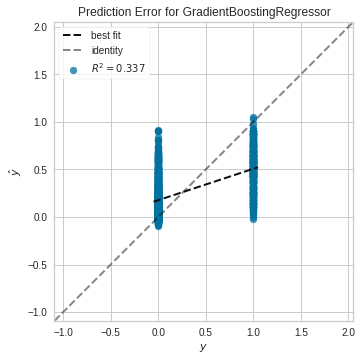

In [124]:
# Comparar predições e resultados do banco de teste
pyreg.plot_model(tuned_gbr, plot='error')

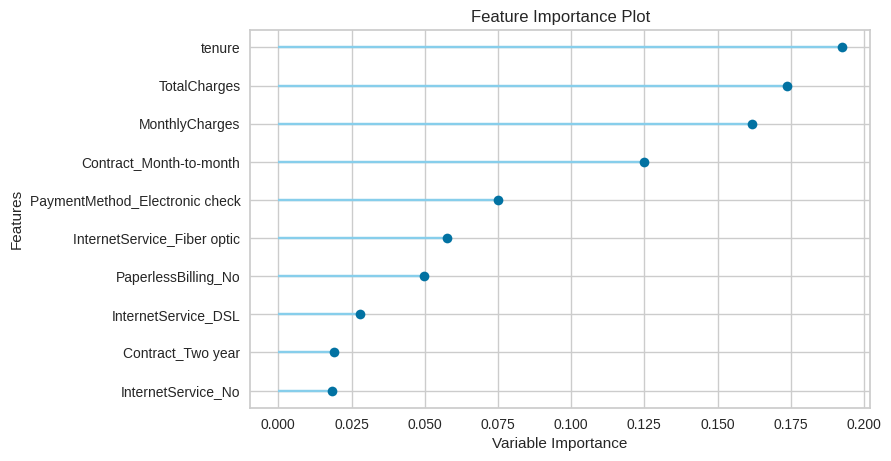

In [293]:
# Verificar importância das variáveis
pyreg.plot_model(tuned_gbr, 'feature')

In [294]:
tuned_gbr_holdout = pyreg.predict_model(tuned_gbr, data = df_test)
tuned_gbr_holdout

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
id,,,,,,,,,,,,,,
5027,Male,0,Yes,Yes,23.0,Yes,No,No,One year,Yes,Credit card (automatic),20.00,445.30,0.036252
1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,One year,No,NaN,99.00,5969.30,0.205253
5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,Month-to-month,Yes,Electronic check,84.75,3050.15,0.490599
6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0.006435
364,Female,0,No,No,47.0,Yes,No,No,Two year,Yes,Mailed check,20.55,945.70,0.009000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,Male,0,No,NaN,24.0,Yes,No,DSL,Month-to-month,Yes,Mailed check,49.70,1167.80,0.258627
6940,Male,0,No,No,35.0,Yes,No,Fiber optic,One year,Yes,Electronic check,89.20,3251.30,0.134758
804,Female,0,Yes,No,46.0,Yes,No,DSL,Two year,Yes,Credit card (automatic),64.20,3009.50,0.008958


In [129]:
tuned_gbr_holdout['Label']

id
5027    0.013048
1733    0.091679
5384    0.448938
6554   -0.002354
364     0.016534
          ...   
4897    0.156539
6940    0.099321
804     0.013712
1143    0.522201
5773    0.009488
Name: Label, Length: 1409, dtype: float64

In [295]:
tuned_gbr_holdout['Churn'] = round(tuned_gbr_holdout['Label'], 0)

In [296]:
tuned_gbr_holdout['Churn'] = tuned_gbr_holdout['Churn'].astype('int')

In [297]:
tuned_gbr_holdout['Churn'].value_counts()

0    1107
1     302
Name: Churn, dtype: int64

In [298]:
df_submit = pd.DataFrame(zip(tuned_gbr_holdout.index, tuned_gbr_holdout['Churn']), columns=['id','Churn'])
#df_submit['Churn'] = df_submit['Churn'].astype('int')
df_submit.to_csv('Churn_pycaret_12.csv', index=False, sep=',')

In [299]:
df_submit['Churn'].value_counts()

0    1107
1     302
Name: Churn, dtype: int64

In [248]:
df_submit.to_csv('Churn_pycaret_07.csv', index=False, sep=',')

In [246]:
df_submit['Churn'] = df_submit['Churn'].astype('int')

In [140]:
df_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.30,0.0
1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.30,0.0
5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0.0
6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0.0
364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.70,0.0
2093,Male,0,Yes,No,72.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),79.55,5810.90,0.0
6966,Female,1,Yes,No,61.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),94.20,5895.45,0.0
5076,Female,0,Yes,Yes,42.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.15,3875.40,0.0
5746,Female,0,Yes,Yes,NaN,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20,0.0


In [61]:
# Finalizando o modelo
final_gbr = pyreg.finalize_model(ml_gbr)

In [ ]:
# Salvando o modelo
pyreg.save_model(final_cb, 'Churn_saved_18112020')